<a href="https://colab.research.google.com/github/JHBaek0306/ImageProcess/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


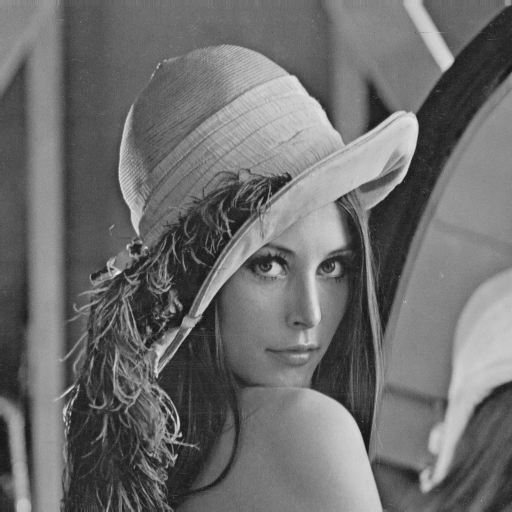

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
images = '/content/drive/MyDrive/Developement/Image/lena_grey.bmp'

img = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Histogram


Text(0.5, 1.0, 'OpenCV')

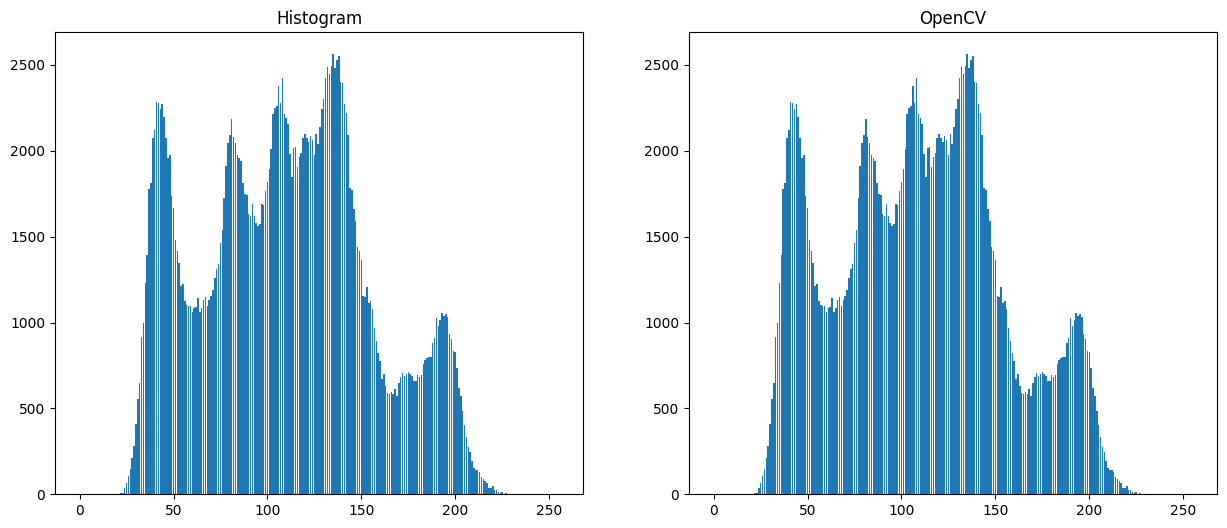

In [3]:
# initialize histogram array filled with 0
histo = np.zeros(shape=(256,), dtype=np.int64)

# get image's height and weight
h, w = img.shape

# Increase the corresponding histogram column by 1
for i in range(h):
    for j in range (w):
        histo[img[j, i]] = histo[img[j, i]] + 1


plt.figure(figsize=(15,6))
# Plot in bar
plt.subplot(1,2,1)
bins = np.arange(0, 256, 1)
plt.bar(bins, histo)
plt.title("Histogram")

# With Open CV
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.subplot(1,2,2)
plt.bar(bins, hist.ravel())
plt.title("OpenCV")

# Histogram Equalization

Text(0.5, 1.0, 'OpenCV')

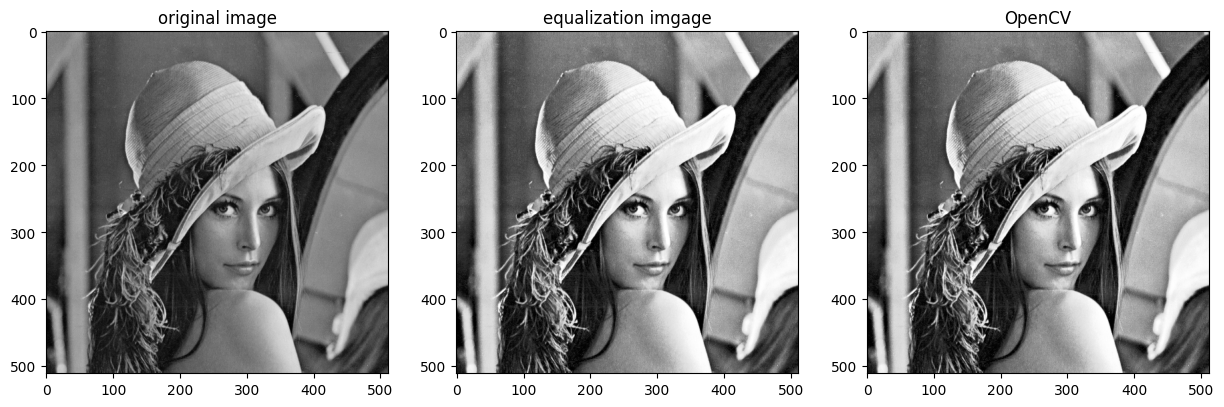

In [4]:
# Probability Density Function
quantization_hist = np.zeros(shape=(256,), dtype=np.float64)
for i in range(256):
    quantization_hist[i] = histo[i] / (h * w)

# Cumulative Distribution Function
cumulative = np.zeros((256,), dtype=np.float64)
for i in range(1, 256):
    cumulative[i] = cumulative[i - 1] + quantization_hist[i]

# Equalization Histogram Function
equalization_hist = np.zeros((256,), dtype=np.float64)
equalization_hist = np.round(cumulative * 255)

equalization_img = np.zeros(shape=(h, w), dtype=np.int64)
for i in range(h):
    for j in range(w):
        equalization_img[i, j] = equalization_hist[img[i, j]]

# Using OpenCV
cv2_equalization_img = cv2.equalizeHist(img)

# Print image
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("original image")

plt.subplot(1,3,2)
plt.imshow(equalization_img, cmap="gray")
plt.title("equalization imgage")

plt.subplot(1,3,3)
plt.imshow(cv2_equalization_img, cmap="gray")
plt.title("OpenCV")

# Two Dimension Histogram

Text(0.5, 1.0, 'Face image')

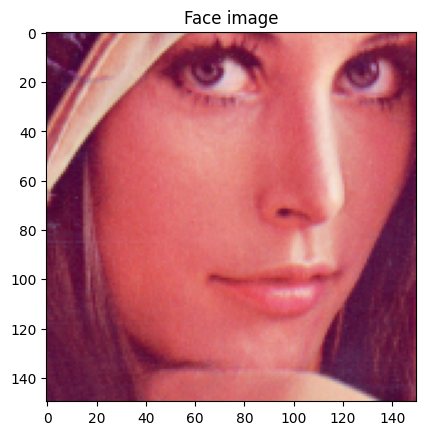

In [8]:
color_img = cv2.imread("/content/drive/MyDrive/Developement/Image/lena.bmp")
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

face_image = np.copy(color_img[250:400, 200:350])
plt.imshow(face_image)
plt.title("Face image")

In [22]:
# Quantization Funciton
def quantize(a, q, L):
    result = int(np.trunc((a * q) / L))
    return result

In [27]:
hsv_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
hsv_face_img = cv2.cvtColor(face_image, cv2.COLOR_BGR2HSV)

# Quantization Mapping
q = 16
L = 256

M, N, V = hsv_face_img.shape
hs_hist = np.zeros(shape=(q, q))

# Quantization
for j in range(M):
    for i in range(N):
        hs_hist[quantize(hsv_face_img[j,i,0],q, L), quantize(hsv_face_img[j,i,1], q, L)] += 1

# Normalize Histogram
n_hs_hist = np.zeros(shape=(q,q))
for j in range(q):
    for i in range(q):
        n_hs_hist[j,i] = hs_hist[j,i] / (M * N)



1.0
